# EMD介绍

https://blog.csdn.net/qq_38130747/article/details/135057322

wasserstein_distance
所属模块：scipy

功能：衡量两个分布之间的相似性

In [4]:
# 实例1：计算EMD距离值

from scipy.stats import wasserstein_distance
x0 = wasserstein_distance([0, 1, 3], [0, 1, 3])#相同的分布，分布的差异为0
x1 = wasserstein_distance([3, 1, 0], [0, 1, 3])#相同分布，但元素顺序打乱，分布的差异值仍然为0
x2 = wasserstein_distance([0, 1, 2], [0, 1, 3])#分布中只有部分值相同，分布的差异值仍然为0.3
x3 = wasserstein_distance([4, 5, 6], [0, 1, 3])#分布完全不同，分布的差异值为3.6
print("x0 = ",x0)
print("x1 = ",x1)
print("x2 = ",x2)
print("x3 = ",x3)

x0 =  0.0
x1 =  0.0
x2 =  0.33333333333333337
x3 =  3.6666666666666665


函数说明
```
scipy.stats.wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)
```
返回值说明 ``返回一个浮点数float，返回值越大，两个分布的距离差别越大``

In [ ]:
实例2:分布中每个点的权重不同

#code-python(3.6)
from scipy.stats import wasserstein_distance
x = wasserstein_distance([3.4, 3.9, 7.5, 7.8], [4.5, 1.4],[1.4, 0.9, 3.1, 7.2], [3.2, 3.5])
#分布1是[3.4, 3.9, 7.5, 7.8]，每个点的权重是[1.4, 0.9, 3.1, 7.2]；
#分布2是[4.5, 1.4]，每个点的权重是[3.2, 3.5]；
print("x = ",x)

In [3]:
from scipy.stats import wasserstein_distance
# 对权重未归一化
wd1 = wasserstein_distance([0,1,2,3],[0,1,2,3], [4,2,1,3],[3,1,2,4])
# wd1 = 0.4
# 前面两个u_values,v_value值不同
wd2 = wasserstein_distance([1,2,3,4],[1,2,3,4], [4,2,1,3],[3,1,2,4])
# wd2 = 0.4
# u_values,v_value 值变化
wd3 = wasserstein_distance([0,1,3,4],[0,1,3,4], [4,2,1,3],[3,1,2,4])
# wd3 = 0.6
# 对示例中的进行归一化处理
wd4 = wasserstein_distance([0,1,2,3],[0,1,2,3], [4/10,2/10,1/10,3/10],[3/10,1/10,2/10,4/10])
# wd4 = 0.4

In [5]:
wd1,wd2,wd3,wd4

(0.39999999999999997,
 0.39999999999999997,
 0.5999999999999999,
 0.4000000000000001)

# 用EMD衡量全局模型和局部模型的距离

In [4]:
import torch
from torch import nn
from matplotlib import pyplot as plt
# 设置全局字体大小为12
plt.rcParams['font.size'] = 16
# 设置全局字体加粗
# plt.rcParams['font.weight'] = 'bold'
# 设置全局字体为SimSun和Times New Roman
plt.rcParams['font.family'] = ['SimHei','SimSun']
plt.rcParams['figure.dpi'] = 500

class Args:
    def __init__(self):
        self.B = 200
        self.root = '/home/raoxy/data/carhacking_dirichlet_05/'
        self.optimizer = "adam"
        self.lr = 0.05
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.weight_decay = 0.0001
        self.E = 1
        self.gamma = 0.1
        self.step_size = 100


args = Args()

class CNN(nn.Module):
    def __init__(self, num_class, name):
        super(CNN, self).__init__()
        self.name = name
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(5),
            nn.Dropout(p=0.5)

        )
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 32, 5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Linear(32, num_class),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = x.view(x.shape[0], -1)  # torch.Size([128, 32])
        x = self.block3(x)
        return x
    
m_global = CNN(num_class=5,name="car_11").to(args.device)
m_car1 = CNN(num_class=5,name="car_1").to(args.device)
m_global.load_state_dict(torch.load(r'D:\Desktop\Iov-with-FL\03-15组会\研究点1涉及到的图\experimental_result\EMD\CNN\pth\CNN.pth'))
m_car1.load_state_dict(torch.load(r'D:\Desktop\Iov-with-FL\03-15组会\研究点1涉及到的图\experimental_result\EMD\CNN\pth\car_1.pth'))
# Dtr, Dte = carHacking_Data(file_name=m.name, args=args)

<All keys matched successfully>

In [ ]:
wasserstein_distance([0,1,2,3],[0,1,2,3],m_global.parameters()[0],m_car1.parameters()[0])

In [5]:
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
pm = My_Train(args.device)

for epoch in range(args.E):
    pm.train(args.device,m, Dtr, optimizer, batch_size=args.B)
#     pm.test(args.device,m, Dte, batch_size=args.B)

Train set: Average loss: 1.6477, Accuracy: 33.0/200 (17.36842105%)


## 封装的函数

In [10]:
from scipy.stats import wasserstein_distance
import torch
from torch import nn
from matplotlib import pyplot as plt
# 设置全局字体大小为12

# 设置全局字体加粗
# plt.rcParams['font.weight'] = 'bold'
# 设置全局字体为SimSun和Times New Roman

# plt.rcParams['figure.dpi'] = 500
# 加载模型权重
def load_model_weights(model_path):
    return torch.load(model_path)

# 计算两个张量之间的EMD距离
def calculate_emd_distance(tensor_a, tensor_b):
    # 将张量移动到CPU并展平
    from scipy.stats import wasserstein_distance
    flattened_a = tensor_a.view(-1).cpu().detach().numpy()
    flattened_b = tensor_b.view(-1).cpu().detach().numpy()

    # 计算EMD距离
    emd = wasserstein_distance(flattened_a, flattened_b)
    return torch.tensor(emd)
def get_emd(model_path_2):
    # 加载模型权重
    model_path_1 = r'D:\Desktop\Iov-with-FL\03-15组会\研究点1涉及到的图\experimental_result\EMD\CNN\pth\CNN.pth'#'/home/raoxy/FedAvg_BT/model/CNN.pth'
    weights_1 = load_model_weights(model_path_1)
    weights_2 = load_model_weights(model_path_2)

    ed=[]
    # 假设我们比较第一层的权重
    for layer_name in weights_1.keys():
        emd_distance = calculate_emd_distance(weights_1[layer_name], weights_2[layer_name])
        ed.append(emd_distance.item())
#         print(f'{layer_name} EMD距离为: {emd_distance}')
    return ed

data={}
for i in range(10):
    data["RSU "+str(i+1)]=get_emd(r'D:\Desktop\Iov-with-FL\03-15组会\研究点1涉及到的图\experimental_result\EMD\CNN\pth\car_'+str(i+1)+'.pth')
#     data["RSU "+str(i)]=get_emd('/home/raoxy/FedAvg_BT/model/car_'+str(i+1)+'.pth')

In [11]:
import pandas as pd

df=pd.DataFrame(data).T

In [12]:
df.columns=['block1.w', 'block1.b', 'block2.w', 'block2.b', 'block3.w', 'block3.b']

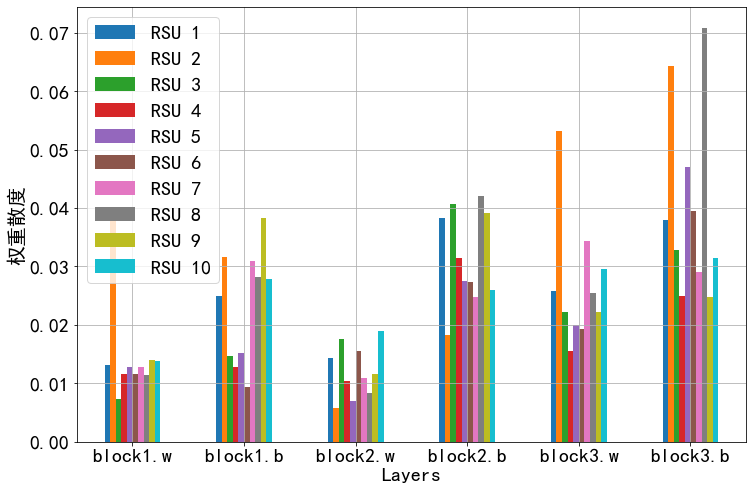

In [16]:
# plt.figure(f)
plt.rcParams['font.family'] = ['SimHei','Times New Roman']
plt.rcParams['font.size'] = 20
df.T.plot(kind="bar",figsize=(12, 8))
plt.xticks(rotation=360)
plt.xlabel('Layers')
plt.ylabel('权重散度')
plt.grid()
plt.show()

## 分析

In [30]:
def FedProx():
    weights_1 = load_model_weights('model/CNN.pth')
    weights_2 = load_model_weights('model/car_1.pth')
    for layer_name in weights_1.keys():
        w = weights_2[layer_name]
        w_t = weights_1[layer_name] 
        print((w - w_t).norm(2)) 
FedProx()

tensor(0.0159, device='cuda:0')
tensor(0.0013, device='cuda:0')
tensor(0.0108, device='cuda:0')
tensor(4.7750e-05, device='cuda:0')
tensor(0.0041, device='cuda:0')
tensor(4.5048e-05, device='cuda:0')


In [35]:
def FedCan():
    weights_1 = load_model_weights('model/CNN.pth')
    weights_2 = load_model_weights('model/car_1.pth')
    for layer_name in weights_1.keys():
        w = weights_2[layer_name]
        w_t = weights_1[layer_name] 
        print(calculate_emd_distance(w, w_t).to('cuda')) 
FedCan()

tensor(8.4334e-05, device='cuda:0', dtype=torch.float64)
tensor(0.0001, device='cuda:0', dtype=torch.float64)
tensor(8.2193e-06, device='cuda:0', dtype=torch.float64)
tensor(6.5783e-06, device='cuda:0', dtype=torch.float64)
tensor(0.0002, device='cuda:0', dtype=torch.float64)
tensor(1.6423e-05, device='cuda:0', dtype=torch.float64)
